# Compare two GEOS-Chem diagnostic datasets
(using GCpy notebook)

## Import dependencies

In [1]:
import os
import numpy as np
import xarray as xr
import xbpch
import gcpy
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Enable auto-reloading modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

## Choose comparison type

In [2]:
comparison = 'nc'


## Load data

In [5]:
# Set netcdf ref data if doing nc vs nc
if comparison == 'nc':
    refdata = xr.open_mfdataset('../../GCrundirs/benchmark_annual_EPA/geosfp_4x5_benchmark/OutputDir/GEOSChem.AerosolMass.20160101_0000z.nc4')
    
# Set netcdf dev data if doing bpch vs nc
if 'nc' in comparison:
    devdata = xr.open_mfdataset('../../GCrundirs/benchmark_annual_EPA/geosfp_4x5_benchmark/OutputDir/GEOSChem.AerosolMass.20160101_0000z.nc4')
    
diurnaldata = xr.open_mfdataset('../../GCrundirs/standalone_monthly/hemco_4x5_geosfp/Output_diurnal/HEMCO_sa_diagnostics.*.nc')
hemco_jandata = xr.open_dataset('../../GCrundirs/standalone_monthly/hemco_4x5_geosfp/OutputDir/HEMCO_sa_diagnostics.201601010000.nc')

## Set and ref and dev strings for including in plots

In [6]:
refstr='GCC NEI2011 netcdf, 12.9.3' # EDIT AS NEEDED
devstr='GCC EPA2016 netcdf, 12.9.3' # EDIT AS NEEDED
    
print('Ref: {}'.format(refstr))
print('Dev: {}'.format(devstr))

Ref: GCC NEI2011 netcdf, 12.9.3
Dev: GCC EPA2016 netcdf, 12.9.3


## Compare species concentrations
Using NO as our comparison, looking at January benchmark

### Define list of variables to plot

In [8]:
desc='BC'
varlist = ['AerMassBC']

print('{} variables found'.format(len(varlist)))
varlist

1 variables found


['AerMassBC']

### Inspect units to make sure they match

In [9]:
for var in varlist:
    print(var)
    print('   ref units: {}'.format(refdata[var].units))
    print('   dev units: {}'.format(devdata[var].units))

AerMassBC
   ref units: ug C m-3
   dev units: ug C m-3


devdata### Plot Single Level Concentrations

In [12]:
devdata['AerMassBC']

<xarray.DataArray 'AerMassBC' (time: 1, lev: 72, lat: 46, lon: 72)>
dask.array<shape=(1, 72, 46, 72), dtype=float32, chunksize=(1, 72, 46, 72)>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-16T12:00:00
  * lev      (lev) float64 0.9925 0.9775 0.9625 ... 4.014e-05 2.635e-05 1.5e-05
  * lat      (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 89.0
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Attributes:
    long_name:         Mass of black carbon aerosol (OA:OC=2.1)
    units:             ug C m-3
    averaging_method:  time-averaged

Reuse existing file: ./conservative_4.0x5.0_1x1.25.nc
Reuse existing file: ./conservative_4.0x5.0_1x1.25.nc


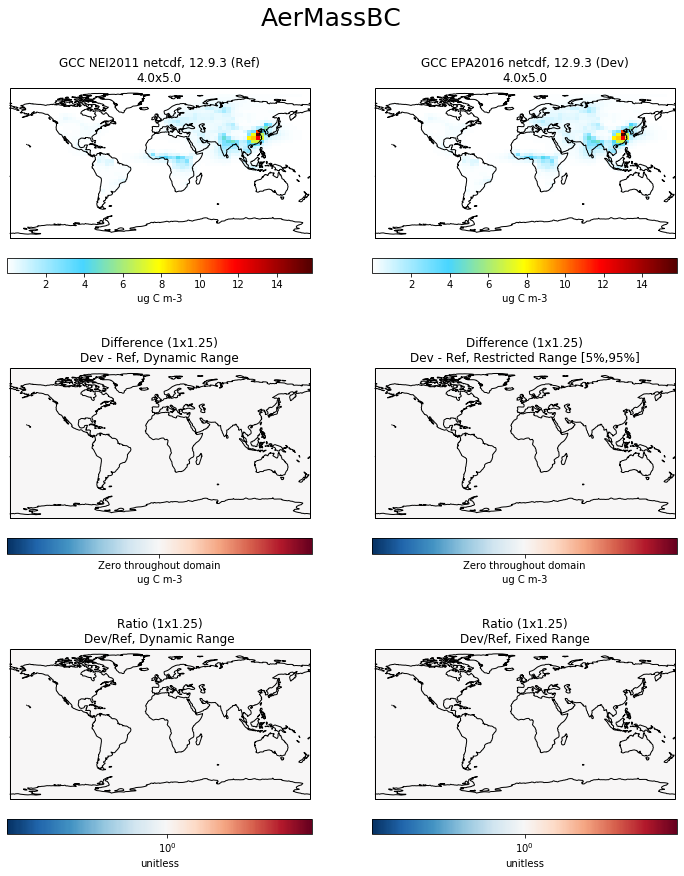

In [10]:
# Try hovering over function name and pressing shift-tab to see optional arguments lst 
# NOTE: cmpres argument is only for when ref and dev grid resolutions differ
gcpy.compare_single_level( refdata, refstr, devdata, devstr, cmpres='1x1.25', varlist=varlist)

Reuse existing file: ./conservative_4.0x5.0_1x1.25.nc
Reuse existing file: ./conservative_4.0x5.0_1x1.25.nc


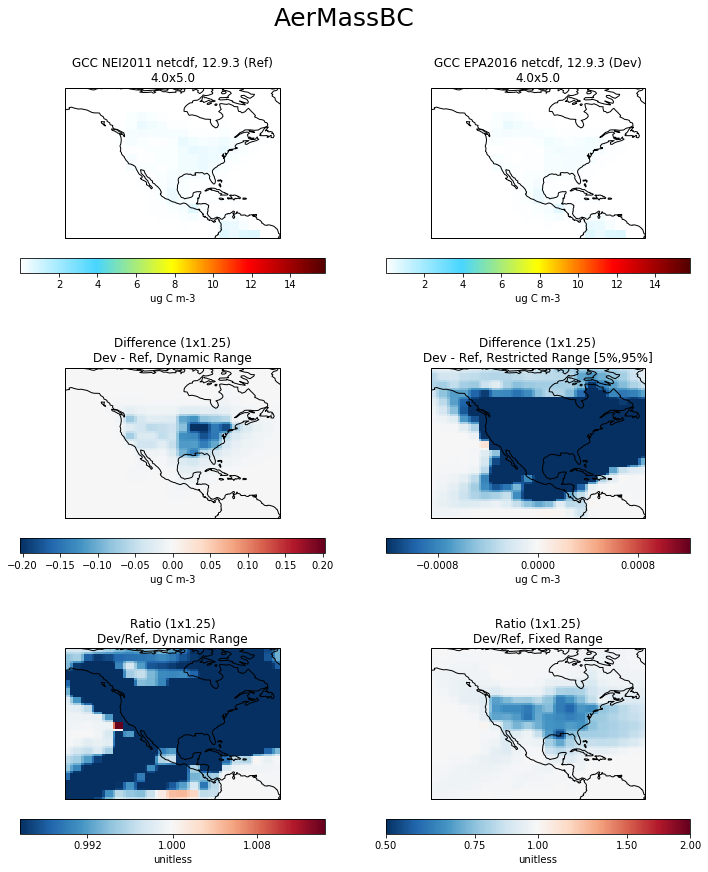

In [12]:
gcpy.compare_single_level( refdata, refstr, devdata, devstr, cmpres='1x1.25', varlist=varlist, plot_extent = [-150, -50, 0, 70])

### Plot Zonal Means

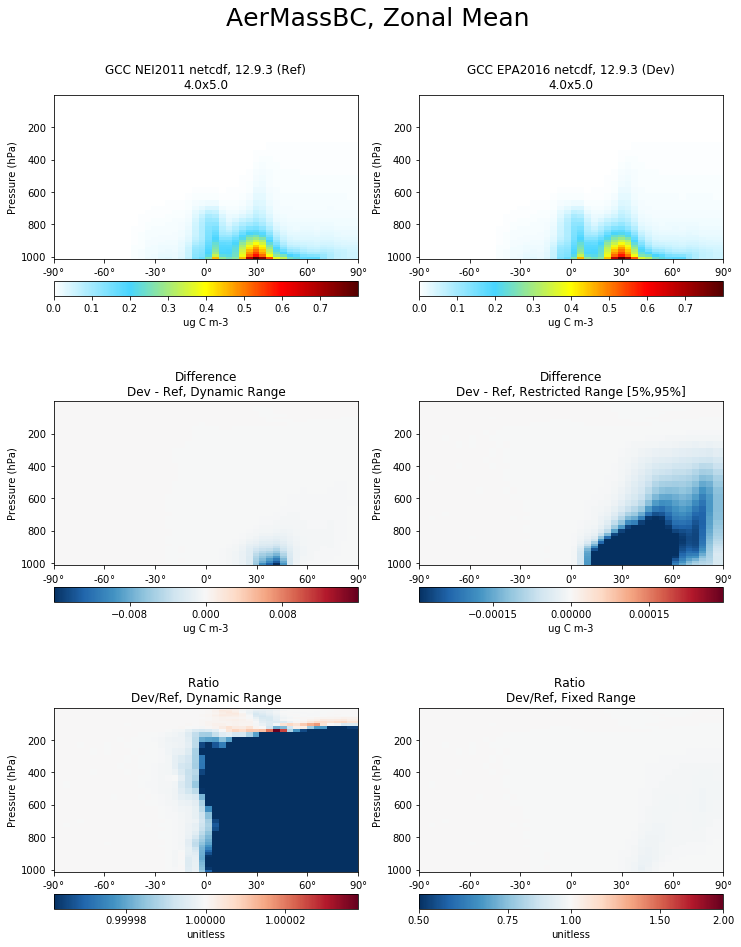

In [13]:
# Zonal mean - quick plot
gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=varlist)

### Send plots to PDF
If you want to a create a pdf with more than one species then redefine varlist prior to passing to plot functions.

In [56]:
# This directory must already exist
plotsdir = './figures'

In [32]:
# Surface - PDF
pdfname = os.path.join(plotsdir,'{}_surface_{}_diag.pdf'.format(desc,comparison))
gcpy.compare_single_level( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

In [33]:
# Zonal mean - PDF
pdfname = os.path.join(plotsdir,'{}_zonalmean_{}_diag.pdf'.format(desc, comparison))
gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')